In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'   #to print multiple outputs 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for splitting
from sklearn.model_selection import train_test_split


#for normality check
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#for correlation analysis
import seaborn as sns



## Importing data 

In [64]:
df=pd.read_csv("03_realestate_dataset.csv",delimiter=";",decimal=",",index_col="No")
#df.drop(["X1 transaction date"],axis=1,inplace=True)
df.shape
df.head(5)
df.dtypes

(414, 7)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

## A Brief Overview of Data and Pre-Processing

In [65]:
df.rename(columns={"X1 transaction date":"trans_date",
                   "X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"distance_MRT",
                  "X4 number of convenience stores":"num_stores",
                  "X5 latitude":"latitude",
                   "X6 longitude":"longitude",

                  "Y house price of unit area":"Price"},inplace=True)
                  

df.describe()

,trans_date,house_age,distance_MRT,num_stores,latitude,longitude,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [66]:
# correlation analysis between explanatory variables and target: price variable
df.corr()

,trans_date,house_age,distance_MRT,num_stores,latitude,longitude,Price
trans_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
num_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

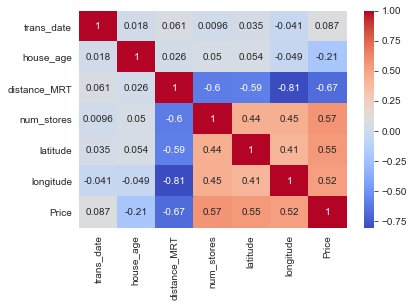

In [67]:

#abs(df.corr()["Price"] )  

#df['distance_center'].corr(df['latitude']) 
#df['distance_center'].corr(df['longitude'])

corr=df.corr()
sns.heatmap(corr,vmax=1,annot=True,cmap="coolwarm")# the significant correlation with distance, # stores , latitude and longitude
 # also a significant correlation btw distance and longitude


/Users/Apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

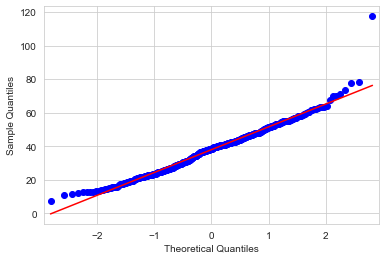

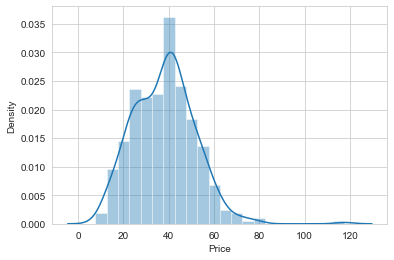

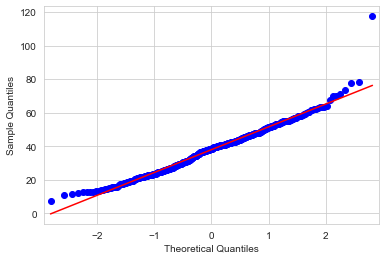

In [68]:
sns.distplot(df['Price']) # from histogram it seems that most of the house prices is distributed around mean value

# q-q plot
qqplot(df["Price"], line='s')
pyplot.show()


#sns.distplot(df['longitude']) # from histogram it seems that most of the house prices is distributed around mean value

# q-q plot
#qqplot(df["longitude"], line='s')
#pyplot.show()







### Explanatory variables vs Target Variable

Text(0.5, 0, 'House age')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Distance to MRT')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Number of stores')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'House price')

Text(0.5, 0, 'Transaction date')

Text(0, 0.5, 'House price')

Text(0.5, 1.0, 'Real Estate Valuation')

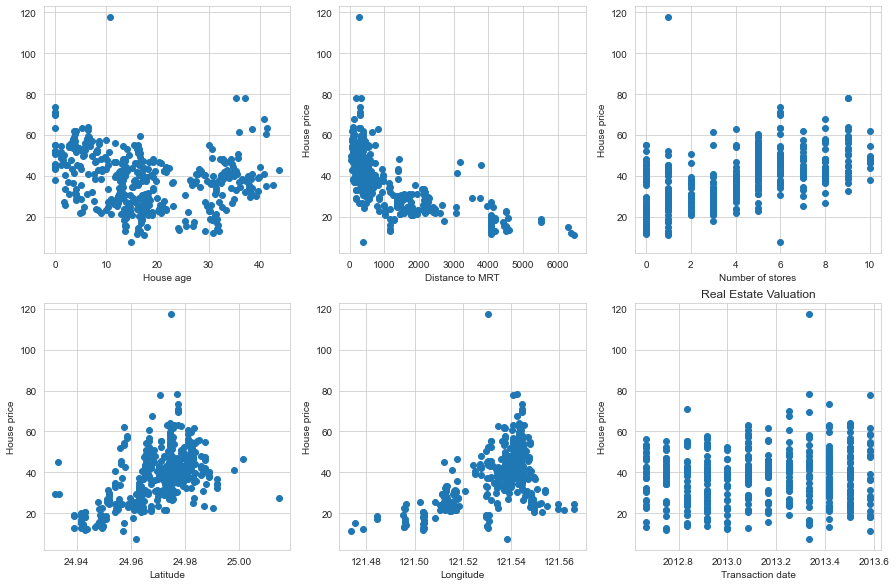

In [69]:
# visualization of relationship btw target variable and indep. variables
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)
ax6=fig.add_subplot(236)


ax1.scatter(x=df['house_age'], y=df['Price'])
ax2.scatter(x=df['distance_MRT'], y=df['Price'])
ax3.scatter(x=df['num_stores'], y=df['Price'])
ax4.scatter(x=df['latitude'], y=df['Price'])
ax5.scatter(x=df['longitude'], y=df['Price'])
ax6.scatter(x=df['trans_date'], y=df['Price'])



ax1.set_xlabel('House age')
ax2.set_ylabel('House price')

ax2.set_xlabel('Distance to MRT')
ax2.set_ylabel('House price')

ax3.set_xlabel('Number of stores')
ax3.set_ylabel('House price')

ax4.set_xlabel('Latitude')
ax4.set_ylabel('House price')

ax5.set_xlabel('Longitude')
ax5.set_ylabel('House price')

ax6.set_xlabel('Transaction date')
ax6.set_ylabel('House price')

plt.title('Real Estate Valuation')
plt.show()

### Visualization of the Variables

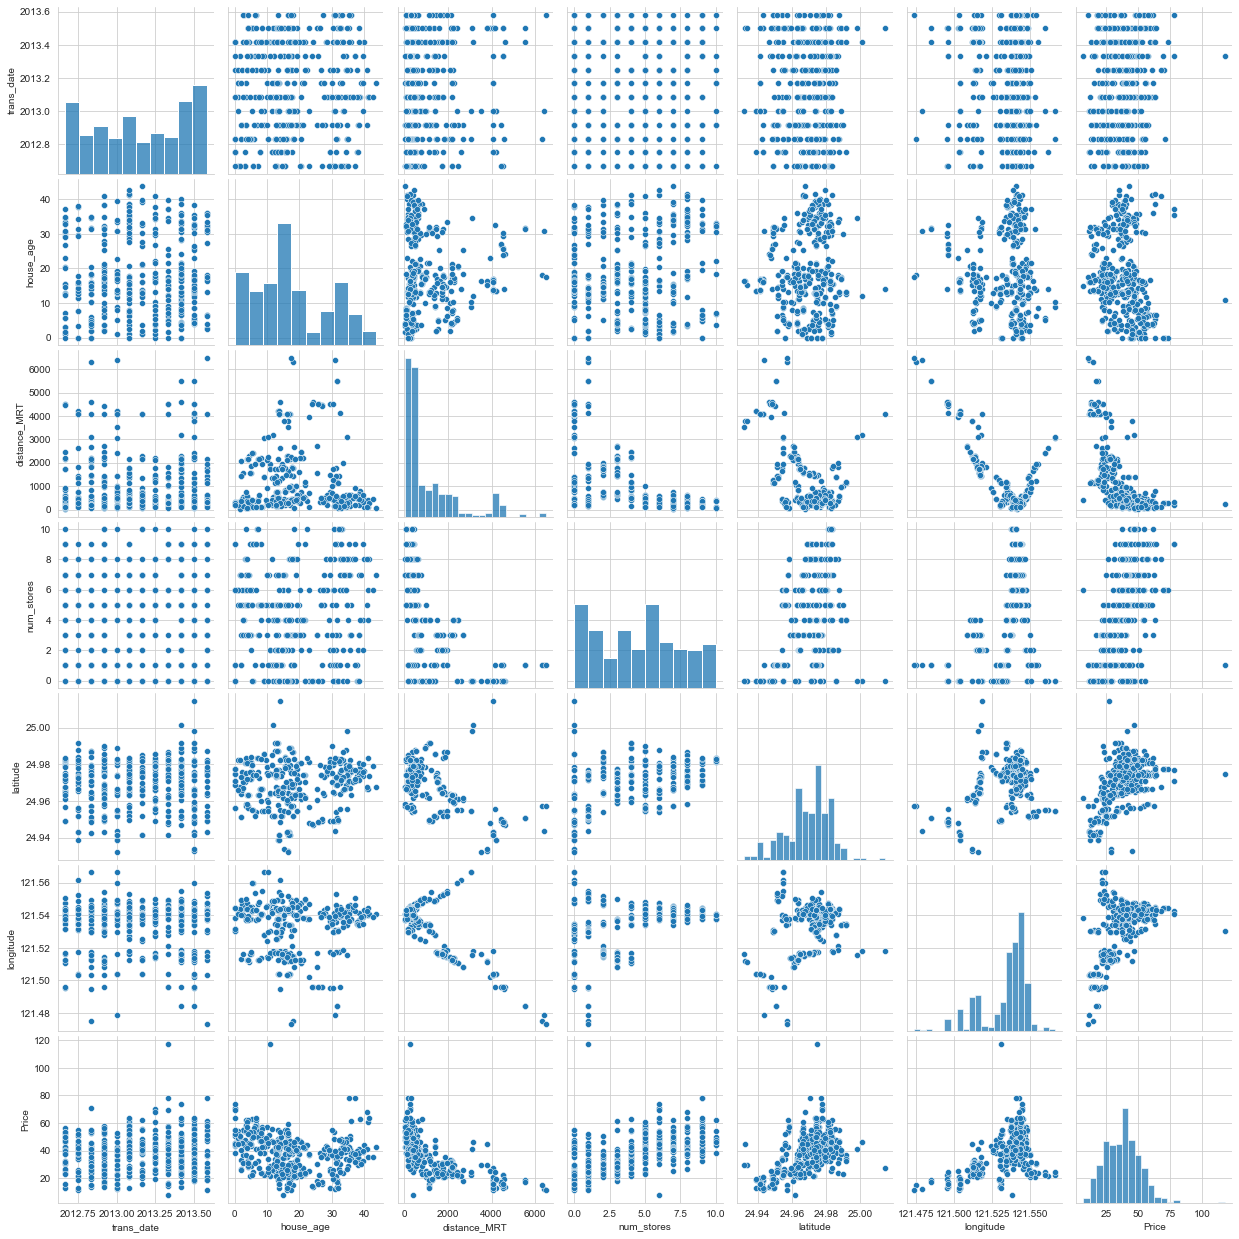

In [70]:
sns.set_style("whitegrid")   #optional plot
#plt.style.use("fivethirtyeight")
sns.pairplot(df)

Text(0.5, 0, 'Latitude in degree')

Text(0, 0.5, 'Longitude in degree')

Text(0.5, 1.0, 'House price vs Coordinates')

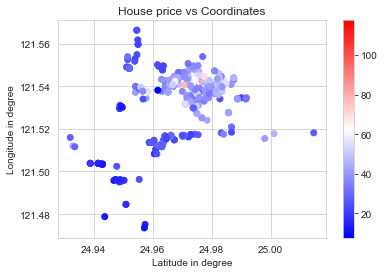

In [71]:
# relationship between coordinates(longitude and latitude) and house price

plt.scatter(x=df['latitude'], y=df['longitude'],c=df['Price'],cmap="bwr")
plt.colorbar()
plt.xlabel('Latitude in degree')
plt.ylabel('Longitude in degree')
plt.title("House price vs Coordinates")




## 1. Implementation of Regression Tree Algorithm

In [72]:
# definition of leaf nodes and decision nodes : feature index, threshold, left, right and variance reduction variables are only for
# decision nodes. value variable is for leaf nodes. 

class Node():
    def __init__(self, feature_index=None, threshold_value=None, left_child=None, right_child=None, variance_reduction=None, value=None):
        self.feature_index=feature_index
        self.threshold_value=threshold_value
        self.left_child=left_child
        self.right_child=right_child
        self.variance_reduction=variance_reduction
        self.value=value

 In above **Node()** class definition, *feature_index* represents the feature which the split will take place and *threshold_value* is the splitting condition value corresponds to this feature. *left_child* and *right_child* variables represents the movements for the left child node and right child nodes. *variance_reduction* variable is used to calculate variance reduction for the corresponding split from the mentioned decision node. Finally, *leaf_value* variable is used to calculate the final leaf node value which is simple the average of class instances in those leaf nodes.


In [73]:



class RegressionTree():
    def __init__(self,min_samples_in_split=2,max_tree_depth=2):  # for the stopping criteria to avoid overfitting problem
        self.root=None 
        self.min_samples_in_split=min_samples_in_split
        self.max_tree_depth=max_tree_depth
        
        
        
    def variance_reduction(self,parent_node,left_child,right_child):
        weight_left_child=len(left_child)/len(parent_node) # is used for scaling
        weight_right_child=len(right_child)/len(parent_node)
        variance_reduction=np.var(parent_node) - (weight_left_child*np.var(left_child) + weight_right_child*np.var(right_child))  
        return variance_reduction
            
    
#define the tree building method
 
    def build_tree(self,dataset,current_depth=0):
        X,Y = dataset[:,:-1], dataset[:,-1]  #seperate the variables from the target variable
        num_samples,num_features=np.shape(X)
        best_split_pool={}
        if num_samples>=self.min_samples_in_split and current_depth<=self.max_tree_depth:
            best_split_pool=self.find_best_split(dataset,num_samples,num_features)
            if best_split_pool["variance_reduction"]>0: 
                left_subtree=self.build_tree(best_split_pool["left_data"],current_depth+1)
                right_subtree=self.build_tree(best_split_pool["right_data"],current_depth+1)
                
                #create the decision node
                return Node(best_split_pool["feature_index"],best_split_pool["threshold_value"], left_subtree,right_subtree,best_split_pool["variance_reduction"])

        
        leaf_value=self.leaf_node_value(Y) #  we use the calculate_leaf_value function to calculate leaf node value
        return Node(value=leaf_value)   
    
    def split(self, dataset,feature_index, threshold_value):
        left_data= np.array([row for row in dataset if row[feature_index]<=threshold_value])
        right_data= np.array([row for row in dataset if row[feature_index]>threshold_value])
        return left_data, right_data
    
    
    def find_best_split(self,dataset,num_samples,num_features):
        best_split_pool={} 
        max_variance_reduction=-float("inf")
        
        for feature_index in range(num_features): #loop through all features and all possible threshold values for that feature
            feature_values=dataset[:,feature_index]
            possible_thresholds=np.unique(feature_values)  
            
            for threshold_value in possible_thresholds:
                left_data, right_data=self.split(dataset, feature_index,threshold_value)
                if len(left_data)>0 and len(right_data)>0: 
                    Y,left_Y,right_Y=dataset[:,-1], left_data[:,-1],right_data[:,-1] 
                    curr_variance_reduction=self.variance_reduction(Y,left_Y,right_Y)  #to calculate the IG or reduction in impurity, use variance reduction
                    
                    if curr_variance_reduction>max_variance_reduction: # if this IG is greater than the max IG then update best split 
                        best_split_pool["feature_index"]=feature_index
                        best_split_pool["threshold_value"]=threshold_value
                        best_split_pool["left_data"]=left_data
                        best_split_pool["right_data"]=right_data
                        best_split_pool["variance_reduction"]=curr_variance_reduction
                        max_variance_reduction=curr_variance_reduction
                    
        return best_split_pool
    
    
    def leaf_node_value(self,Y):
        leaf_val=np.mean(Y)
        return leaf_val
    

    #to print the decision tree     
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree=self.root
            
        
        if tree.value is not None:
            print(tree.value)
            
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold_value, "?", tree.variance_reduction)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left_child, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right_child, indent +  indent)
            
    
    def fit(self, X,Y):
        
        dataset=np.concatenate((X,Y), axis=1)
        self.root= self.build_tree(dataset)  #build the tree to train the model
        
    
    def make_prediction(self,x,tree): # take a single data point and find the corresponding y value
        # start with root node, if it meets the conditions, then it goes to left child else moves to the right node. repeat 
        # till you reach to the leaf node
        
        if tree.value!=None: 
            return tree.value
        feature_val=x[tree.feature_index]
        if feature_val<= tree.threshold_value:
            return self.make_prediction(x,tree.left_child)
        else:
            return self.make_prediction(x,tree.right_child)
        
        
        
    def predict(self,X):
        predictions=[self.make_prediction(x,self.root) for x in X]
        return predictions  #an array of target values
            

In [74]:

# Training and test split

X=df.iloc[:,:-1].values
Y= df.iloc[:,-1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)


X_train.shape
X_test.shape





(331, 6)

(83, 6)

In [75]:
# now fit the model

regressor= RegressionTree(min_samples_in_split=3,max_tree_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_2 <= 967.4 ? 82.36533475987822
 left:X_1 <= 8.5 ? 20.92490340212737
  left:X_2 <= 383.8624 ? 8.604444444444454
    left:X_5 <= 121.54102 ? 12.12001851851852
        left:49.98666666666668
        right:57.17777777777778
    right:X_0 <= 2013.417 ? 11.857999999999995
        left:43.81
        right:53.05
  right:X_2 <= 330.0854 ? 12.728022081608842
    left:X_5 <= 121.54026 ? 22.64988587104476
        left:39.07058823529412
        right:49.266666666666666
    right:X_4 <= 24.96398 ? 9.182353578336553
        left:29.581818181818186
        right:39.47659574468085
 right:X_5 <= 121.51046 ? 16.877603697493974
  left:X_0 <= 2013.417 ? 3.0527681331747907
    left:X_2 <= 2469.645 ? 1.4840052631578944
        left:21.8
        right:16.210526315789473
    right:X_0 <= 2013.5 ? 10.27555555555556
        left:21.4
        right:11.2
  right:X_4 <= 24.9832 ? 13.405732981548788
    left:X_1 <= 21.7 ? 8.801822909685551
        left:26.82857142857143
        right:18.2
    right:X_3 <= 0.0 ? 40

In [76]:
# Test the model by calculating MSE, RMSE,R^2
Y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mean_squared_error(Y_test,Y_pred)
np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_score(Y_test, Y_pred)
mean_absolute_error(Y_test, Y_pred)


120.08478862144297

10.958320520109044

0.5496542220999227

6.2964876589170675

In [77]:
reg_tree_results = pd.DataFrame(data=[["Regression Tree",mean_absolute_error(Y_test, Y_pred),mean_squared_error(Y_test,Y_pred),np.sqrt(mean_squared_error(Y_test,Y_pred)),r2_score(Y_test, Y_pred),0.000]], 
                          columns=["Reg. Model", 'MAE', 'MSE', 'RMSE', 'R^2','CV'])
reg_tree_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Regression Tree,6.296488,120.084789,10.958321,0.549654,0.0



## 2. Application of Linear Regression by scikit-learn

In [78]:
# Training and test split

X = df.drop('Price', axis =1)


Y= df['Price']


X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)

In [79]:
# k=10 fold cross validation is used for models
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def evaluate(actual, predicted):
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    return mae, mse, rmse, r_square

def print_evaluate(actual, predicted):  
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r_square = metrics.r2_score(actual, predicted)
    print('Mean absolute error is:', mae)
    print('Mean squared error is:', mse)
    print('Root mean squared error is:', rmse)
    print('R-Square is:', r_square)
    
    


In [80]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression() 
lm.fit(X_train,Y_train)


LinearRegression()

In [81]:
print(lm.coef_)
print(lm.intercept_)

[ 5.02428313e+00 -2.38111162e-01 -3.48511755e-03  1.24068016e+00
  2.35861586e+02  3.00563347e+01]
-19616.245367803986


In [82]:
lm_coeff= pd.DataFrame(lm.coef_, X.columns, columns=['Linear Regression Coeff.'])
lm_coeff

,Linear Regression Coeff.
trans_date,5.024283
house_age,-0.238111
distance_MRT,-0.003485
num_stores,1.240680
latitude,235.861586
longitude,30.056335


Text(0.5, 0, 'True Values ')

Text(0, 0.5, 'Predictions ')

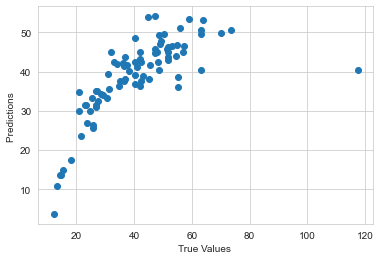

In [83]:
# Making the predictions
predictions = lm.predict(X_test)

# visual representations of predictions
plt.scatter(Y_test, predictions)  # not very good predictions!
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

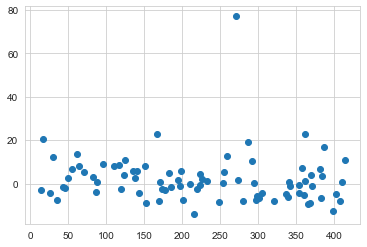

In [84]:
# plotting the differences btw actual and predictions

plt.plot(Y_test - predictions,marker='o',linestyle='')

In [85]:
test_predictions = lm.predict(X_test)
train_predictions = lm.predict(X_train)

print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")

print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)

Performance metrics for test set:

Mean absolute error is: 7.036066018747604
Mean squared error is: 134.5707949696009
Root mean squared error is: 11.600465291082116
R-Square is: 0.4953283422577047


Performance metrics for training set:

Mean absolute error is: 5.925033113382187
Mean squared error is: 63.670399929511596
Root mean squared error is: 7.979373404567028
R-Square is: 0.6058697096894292


In [86]:
lm_results = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_predictions) , cross_val(LinearRegression())]], 
                          columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', "CV"])
lm_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Linear Regression,7.036066,134.570795,11.600465,0.495328,0.581854


In [87]:
perf_metrics1 = reg_tree_results.append(lm_results, ignore_index=True)
perf_metrics1

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Regression Tree,6.296488,120.084789,10.958321,0.549654,0.000000
1,Linear Regression,7.036066,134.570795,11.600465,0.495328,0.581854


## 3.Application of Random Forest Regression by scikit-learn

In [89]:
# Training and test split

X = df.drop('Price', axis =1)


Y= df['Price']


X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)

In [88]:
# Random Forest by scikit-learn
from sklearn.ensemble import RandomForestRegressor


In [90]:

random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, Y_train)

test_predictions = random_forest.predict(X_test)
train_predictions = random_forest.predict(X_train)



print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_predictions)

print("\n")
print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_predictions)



random_forest_results = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_predictions), cross_val(RandomForestRegressor())]], 
                            columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', 'CV'])


random_forest_results

RandomForestRegressor(n_estimators=500)

Performance metrics for test set:

Mean absolute error is: 5.292449173838192
Mean squared error is: 105.95220107488736
Root mean squared error is: 10.293308558227881
R-Square is: 0.602654699558048


Performance metrics for training set:

Mean absolute error is: 1.8004718616026507
Mean squared error is: 6.413994139368996
Root mean squared error is: 2.5325864524965374
R-Square is: 0.9602963170484486


,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Random Forest Regressor,5.292449,105.952201,10.293309,0.602655,0.693194


In [91]:
# Performance metrics together

perf_metrics2 = perf_metrics1.append(random_forest_results, ignore_index=True)
perf_metrics2

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Regression Tree,6.296488,120.084789,10.958321,0.549654,0.000000
1,Linear Regression,7.036066,134.570795,11.600465,0.495328,0.581854
2,Random Forest Regressor,5.292449,105.952201,10.293309,0.602655,0.693194


## 4.Application of DecisionTreeRegression by scikit-learn

In [93]:
# Training and test split

X = df.drop('Price', axis =1)


Y= df['Price']


X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20, random_state=41)

In [94]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
test_set_predictions = regressor.predict(X_test)
train_set_predictions = regressor.predict(X_train)

In [96]:
print("Performance metrics for test set:\n")
print_evaluate(Y_test, test_set_predictions)

print("\n")
print("Performance metrics for training set:\n")
print_evaluate(Y_train, train_set_predictions)


Performance metrics for test set:

Mean absolute error is: 6.295180722891566
Mean squared error is: 147.4975903614458
Root mean squared error is: 12.144858597836608
R-Square is: 0.4468498647309016


Performance metrics for training set:

Mean absolute error is: 0.19637462235649547
Mean squared error is: 0.6012386706948641
Root mean squared error is: 0.7753958154999704
R-Square is: 0.9962782333377951


In [97]:
decision_tree_results = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(Y_test, test_set_predictions), cross_val(DecisionTreeRegressor())]], 
                            columns=['Reg. Model', 'MAE', 'MSE', 'RMSE', 'R^2', 'CV'])
decision_tree_results

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,DecisionTreeRegressor,6.295181,147.49759,12.144859,0.44685,0.443706


In [98]:
# Performance metrics together

perf_metrics_final = perf_metrics2.append(decision_tree_results, ignore_index=True)
perf_metrics_final

,Reg. Model,MAE,MSE,RMSE,R^2,CV
0,Regression Tree,6.296488,120.084789,10.958321,0.549654,0.000000
1,Linear Regression,7.036066,134.570795,11.600465,0.495328,0.581854
2,Random Forest Regressor,5.292449,105.952201,10.293309,0.602655,0.693194
3,DecisionTreeRegressor,6.295181,147.497590,12.144859,0.446850,0.443706
